<a href="https://colab.research.google.com/github/anantsimran/Kaggle-Iris-KNN/blob/master/kaggle_uciml_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!ls
!mkdir /root/.kaggle
from google.colab import files
uploaded = files.upload()
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

sample_data


Saving kaggle.json to kaggle.json
- path is now set to: {/content}
ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-17 22:02:37          52671  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           3880  
praveengovi/coronahack-chest-xraydataset                       CoronaHack -Chest X-Ray-Dataset                       1GB  2020-03-20 01:26:40            555  
katerpillar/meteonet                                           MeteoNet North-West France                           11GB  2020-04-16 08:35

In [2]:
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!jupyter contrib nbextension install --user
!jupyter nbextension enable hinterland/hinterland

     / 29.4MB 11.2MB/s
     |████████████████████████████████| 870kB 7.1MB/s 
     |████████████████████████████████| 481kB 49.1MB/s 
  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.5.1-py2.py3-none-any.whl size=23430599 sha256=6e55949291d1a059d0fbceece0fcbcb5b6827394ac7ab9ea2fdf8eabac5e5712
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_9milom/wheels/22/4a/9f/df59e985684a10ea0e025300581870b5b3a300ee3525f0eef5
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=8b8819776a2e7a45f7a0566e1f1aba27931cd0e4d346765fa9aa1dfc6b9a403f
  Stored in directory: /root/.cache/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465825 sha256=b9b31bbe69e411ecffc31338b73b6046c3641d8f80ce6327e6ac739343cc08ce
  Stored in directory: /root/.cache/pip/whee

In [3]:
!kaggle datasets download -d uciml/iris -p iris
!ls -larth

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 1.92MB/s]
total 24K
drwxr-xr-x 1 root root 4.0K Apr  3 16:24 sample_data
drwxr-xr-x 1 root root 4.0K Apr 15 16:10 .config
drwxr-xr-x 1 root root 4.0K Apr 18 08:58 ..
-rw-r--r-- 1 root root   67 Apr 18 09:03 kaggle.json
drwxr-xr-x 1 root root 4.0K Apr 18 09:03 .
drwxr-xr-x 2 root root 4.0K Apr 18 09:03 iris


In [4]:
!ls iris/
!unzip iris/iris.zip -d .
!ls -larth

iris.zip
Archive:  iris/iris.zip
  inflating: ./Iris.csv              
  inflating: ./database.sqlite       
total 44K
-rw-r--r-- 1 root root 5.0K Sep 19  2019 Iris.csv
-rw-r--r-- 1 root root  10K Sep 19  2019 database.sqlite
drwxr-xr-x 1 root root 4.0K Apr  3 16:24 sample_data
drwxr-xr-x 1 root root 4.0K Apr 15 16:10 .config
drwxr-xr-x 1 root root 4.0K Apr 18 08:58 ..
-rw-r--r-- 1 root root   67 Apr 18 09:03 kaggle.json
drwxr-xr-x 2 root root 4.0K Apr 18 09:03 iris
drwxr-xr-x 1 root root 4.0K Apr 18 09:03 .


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import math
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load our warnings libraries
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('Iris.csv')

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
data.drop(labels='Id',axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


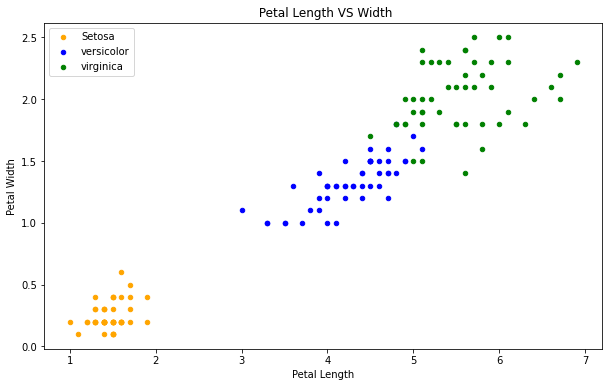

In [13]:
%matplotlib inline
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.ion()
plt.show()

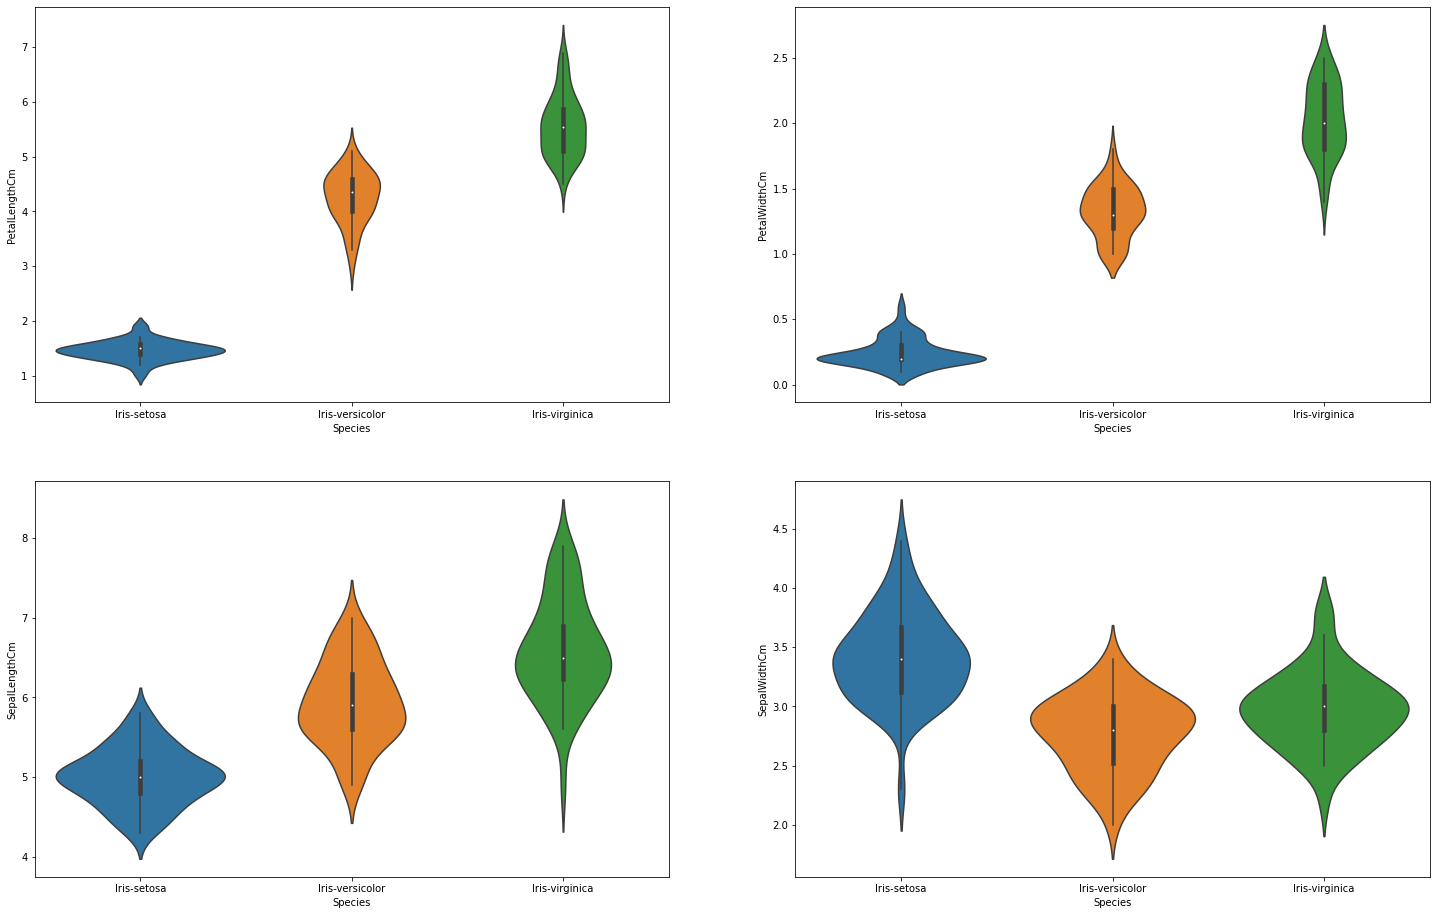

In [14]:
#let us see how the length and width vary according to the species
plt.figure(figsize=(25,16))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

In [0]:
data = data.sample(frac=1)
data.reset_index(drop=True, inplace=True)

In [16]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.3,3.3,4.7,1.6,Iris-versicolor
1,6.8,3.2,5.9,2.3,Iris-virginica
2,5.1,3.7,1.5,0.4,Iris-setosa
3,5.4,3.7,1.5,0.2,Iris-setosa
4,5.7,3.0,4.2,1.2,Iris-versicolor


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,test = train_test_split(data,train_size=0.7)

In [19]:
data.columns[data.columns!='Species']

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [0]:
train_X = train.loc[:, data.columns != 'Species']
train_Y = train.Species
test_X = test.loc[:, data.columns != 'Species']
test_Y = test.Species



In [21]:
test_Y.head()

46     Iris-virginica
24     Iris-virginica
82        Iris-setosa
11    Iris-versicolor
8      Iris-virginica
Name: Species, dtype: object

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)


In [0]:
from sklearn import metrics

In [24]:
print(metrics.accuracy_score(test_Y,prediction))

0.9777777777777777


In [25]:
for i in range(1,20):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
  prediction=model.predict(test_X)
  print(str(i)+ ": "+ str(metrics.accuracy_score(test_Y,prediction)))

1: 0.9555555555555556
2: 0.9555555555555556
3: 0.9777777777777777
4: 0.9777777777777777
5: 0.9777777777777777
6: 0.9777777777777777
7: 0.9777777777777777
8: 0.9555555555555556
9: 0.9777777777777777
10: 0.9777777777777777
11: 0.9777777777777777
12: 0.9777777777777777
13: 0.9777777777777777
14: 0.9777777777777777
15: 0.9777777777777777
16: 0.9333333333333333
17: 0.9777777777777777
18: 0.9333333333333333
19: 0.9333333333333333
